In [24]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')

In [25]:
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [26]:
df =  pd.DataFrame(data= data.data, columns= data.feature_names)
df['target'] = data.target
df['flower'] = df.target
df['flower'].replace([0,1,2], ['setosa','versicolor','virginica'], inplace= True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [27]:
setosa = df[df['flower']=='setosa']
versicolor = df[df['flower']=='versicolor']
virginica = df[df['flower']=='virginica']

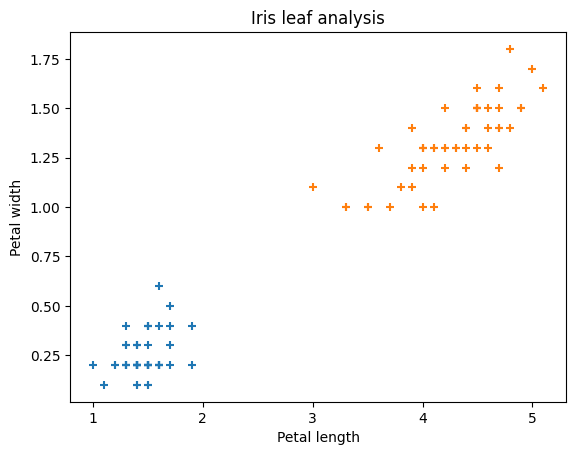

In [28]:
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'], marker= '+')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'], marker= '+')
plt.title('Iris leaf analysis')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

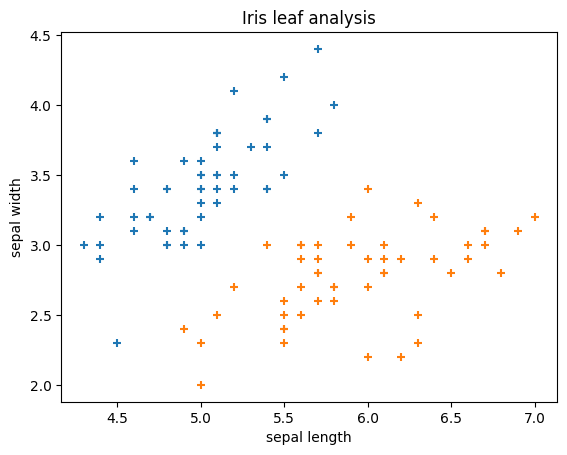

In [29]:
plt.scatter(setosa['sepal length (cm)'],setosa['sepal width (cm)'], marker= '+')
plt.scatter(versicolor['sepal length (cm)'],versicolor['sepal width (cm)'], marker= '+')
plt.title('Iris leaf analysis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [30]:
categorical_features = df.drop(['target','flower'],axis=1)
target = df.target

In [31]:
categorical_features.shape

(150, 4)

In [32]:
target.shape

(150,)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(categorical_features, target, random_state=50, test_size=.2)

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9

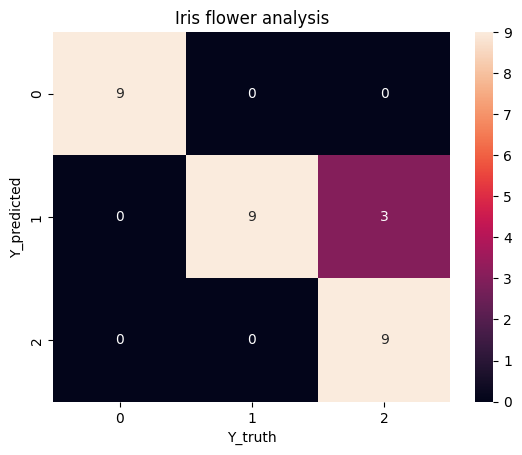

In [35]:
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)
plt.title('Iris flower analysis')
plt.xlabel('Y_truth')
plt.ylabel('Y_predicted')
plt.show()